In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
df=pd.read_csv("Rossmann Stores Data.csv")
df1=pd.read_csv("store.csv")

C:\Users\spand\AppData\Local\Temp\ipykernel_15348\2457002533.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Rossmann Stores Data.csv")


In [2]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df.shape

(1017209, 9)

In [5]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
print(df['Date'].min(),'--->>initial start date ')
print(df['Date'].max(),'--->>final end date')

2013-01-01 --->>initial start date 
2015-07-31 --->>final end date


In [7]:
# extract year, month, day and week of year from "Date"

df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df['WeekOfYear'] = df['Date'].apply(lambda x: x.weekofyear)

In [8]:
df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
df.drop(columns=["Date"], inplace=True)
df.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,5263,555,1,1,0,1,2015,7,31,31
1,2,5,6064,625,1,1,0,1,2015,7,31,31


<AxesSubplot:>

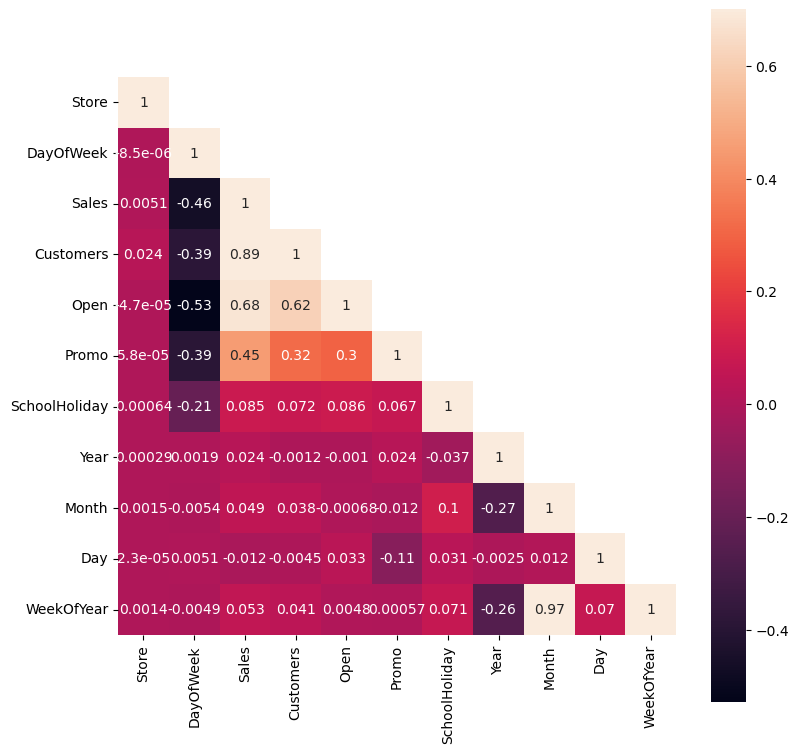

In [9]:
# Heatmap of the Rossman Dataset

correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

As we can see that in the graph given below that Stores mainly closed on Sunday

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

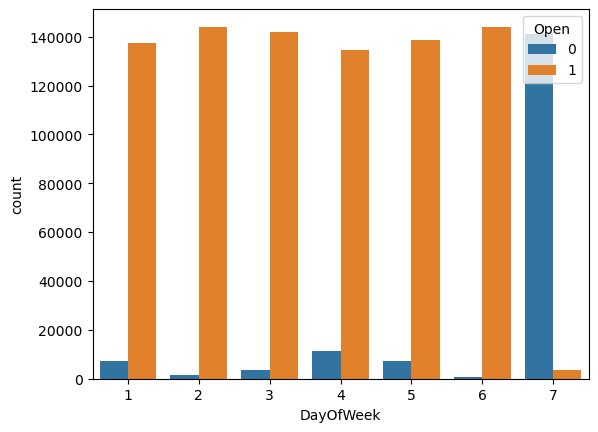

In [10]:
sns.countplot(x='DayOfWeek',hue='Open',data=df)

Sales Are nearly doubled High When Promo is Running

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

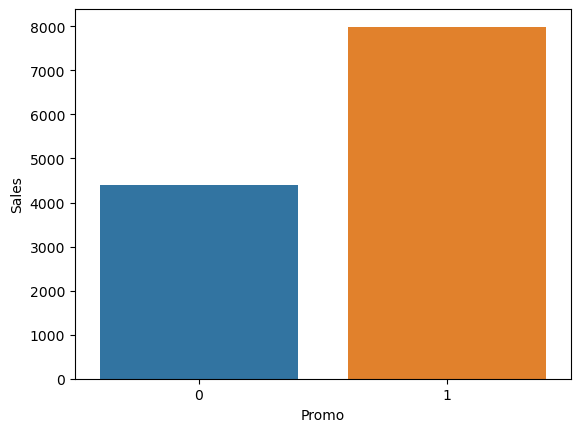

In [11]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.


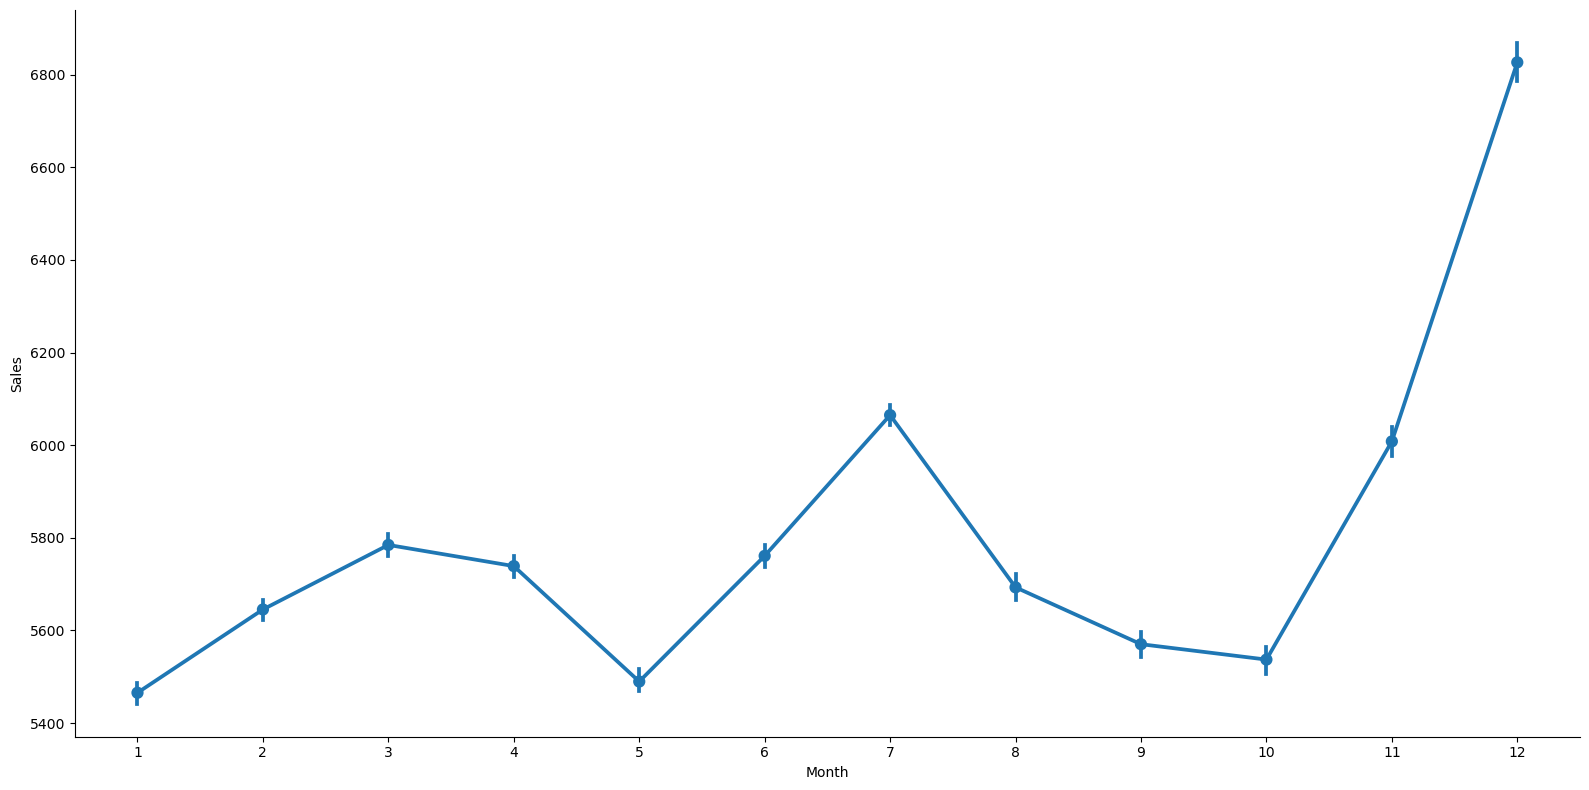

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.factorplot(x="Month" ,y = "Sales" , data=df, kind="point", aspect=2,size=8)

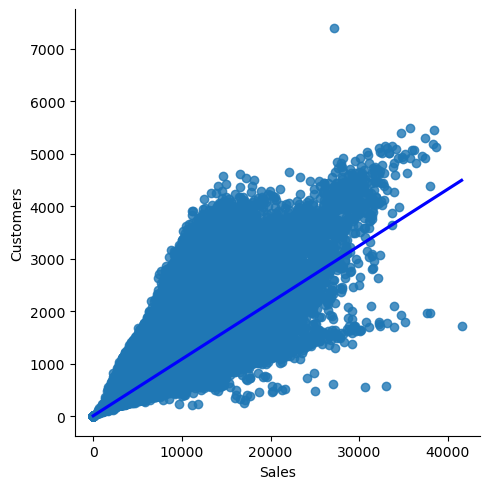

In [13]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=df, height=5,aspect=1, line_kws={'color':'blue'})

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday

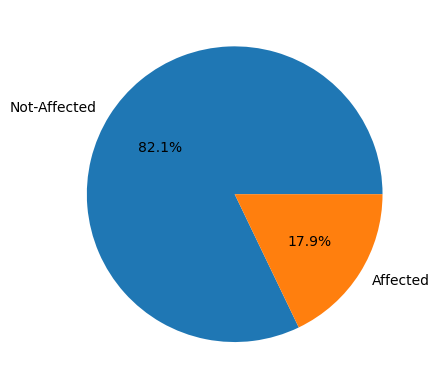

In [14]:
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%')
plt.show()

*We can see that there is not such significant differences in these 3 years in terms of sales.*

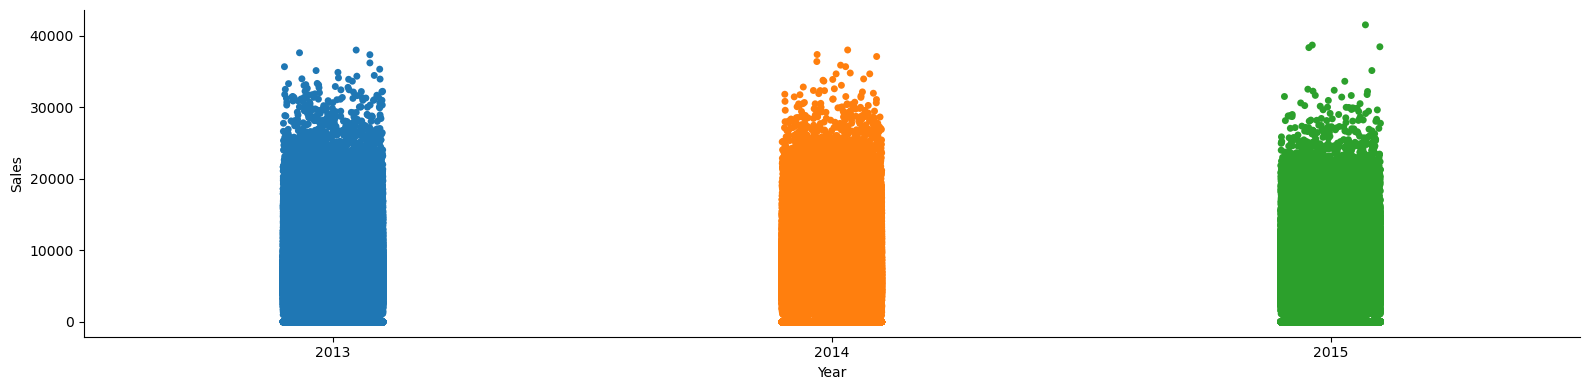

In [15]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=df, height=4, aspect=4 );

Conclusion of the analysis:
Sales are highly correlated to number of Customers.

The most selling and crowded store type is A.

StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

StoreTybe D had the highest buyer cart.

Promo runs only in weekdays.

For all stores, Promotion leads to increase in Sales and Customers both.

More stores are opened during School holidays than State holidays.

The stores which are opened during School Holiday have more sales than normal days.

Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.

Promo2 doesnt seems to be correlated to any significant change in the sales amount.

Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.

In [16]:
# remove features
df1 = df1.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [17]:
df = pd.merge(df, df1, how='left', on='Store')
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


<AxesSubplot:xlabel='Sales'>

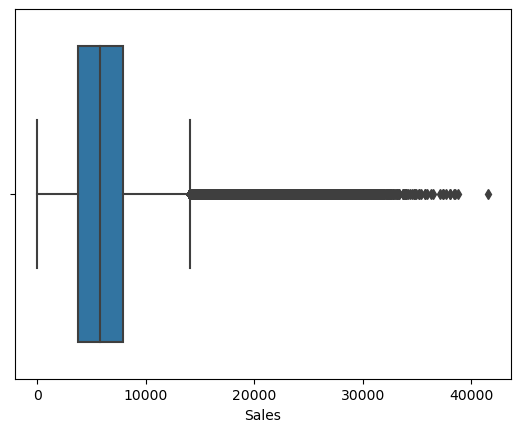

In [18]:
#checking outliers in sales
sns.boxplot(df['Sales'])

In [19]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

In [30]:
df_new = pd.get_dummies(df,columns=['StoreType','Assortment', 'StateHoliday'])

In [31]:
df_new.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,2015,7,31,...,1,0,1,0,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,2015,7,31,...,0,0,1,0,0,0,1,0,0,0
2,3,5,8314,821,1,1,1,2015,7,31,...,0,0,1,0,0,0,1,0,0,0
3,4,5,13995,1498,1,1,1,2015,7,31,...,1,0,0,0,1,0,1,0,0,0
4,5,5,4822,559,1,1,1,2015,7,31,...,0,0,1,0,0,0,1,0,0,0


In [32]:
X = df_new.drop(['Sales','Store','Year'] , axis = 1)
y= df_new.Sales

In [41]:
# X.drop(columns=["CompetitionDistance"], inplace=True)
X

,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Month,Day,WeekOfYear,Promo2,StoreType_a,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5,555,1,1,1,7,31,31,0,0,...,1,0,1,0,0,0,1,0,0,0
1,5,625,1,1,1,7,31,31,1,1,...,0,0,1,0,0,0,1,0,0,0
2,5,821,1,1,1,7,31,31,1,1,...,0,0,1,0,0,0,1,0,0,0
3,5,1498,1,1,1,7,31,31,0,0,...,1,0,0,0,1,0,1,0,0,0
4,5,559,1,1,1,7,31,31,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
1017205,2,0,0,0,1,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1017206,2,0,0,0,1,1,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1017207,2,0,0,0,1,1,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0


In [42]:
y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 990515, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)
train_score=rdfreg.score(X_train, y_train)
test_score=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score, "," ,
      "Test Score" ,":" , test_score)   

y_predicted = rdfreg.predict(X_train)
y_test_predicted = rdfreg.predict(X_test)

Regresion Model Score : 0.9855403988998304 , Test Score : 0.913549796683473


In [48]:
r2= r2_score(y_test, y_test_predicted)

In [49]:
r2

0.913549796683473